In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("interlaced_features.csv", index_col=0)

In [3]:
angles = df[["angle_0","angle_1","angle_2","angle_3","angle_4","angle_5"]]

In [4]:
angles = angles-np.min(angles.values)
angles = angles*1/np.max(angles)

In [5]:
len(angles)

39084

In [6]:
39084/3

13028.0

In [7]:
piecewise_angles = np.zeros([13028,18])

In [8]:
piecewise_angles[:,0:6] = angles.values[0::3,:]
piecewise_angles[:,6:12] = angles.values[1::3,:]
piecewise_angles[:,12:18] = angles.values[1::3,:]

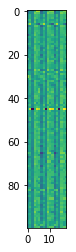

In [9]:
plt.imshow(piecewise_angles[:100,:])

In [10]:
labels = pd.read_csv("labels.csv",header=0)

In [11]:
labels = labels["is_bended"]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(piecewise_angles, labels, test_size=0.2, random_state=42)

In [13]:
y_test.sum(axis=0)

1073.0

In [14]:
len(y_test)-y_test.sum(axis=0)

1533.0

In [15]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [16]:
sample_targets = np.array(y_train)[0]

In [42]:
batch_size = 10
epochs = 200
num_classes = 1

In [43]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

model = Sequential()
#model.add(Conv2D(1, kernel_size=(1, 1),activation='relu',input_shape=input_shape))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

x_train shape: (10422, 18)
10422 train samples
2606 test samples


In [44]:
history = model.fit(x_train, y_train.values,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test.values))
score = model.evaluate(x_test, y_test.values, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 10422 samples, validate on 2606 samples
Epoch 1/200
10422/10422 [==============================] - 4s 365us/step - loss: 0.6722 - accuracy: 0.6003 - val_loss: 0.6699 - val_accuracy: 0.6159
Epoch 2/200
10422/10422 [==============================] - 3s 331us/step - loss: 0.6189 - accuracy: 0.6611 - val_loss: 0.6498 - val_accuracy: 0.6109
Epoch 3/200
10422/10422 [==============================] - 3s 318us/step - loss: 0.5840 - accuracy: 0.6934 - val_loss: 0.5799 - val_accuracy: 0.7111
Epoch 4/200
10422/10422 [==============================] - 4s 363us/step - loss: 0.5736 - accuracy: 0.7062 - val_loss: 0.5548 - val_accuracy: 0.7210
Epoch 5/200
10422/10422 [==============================] - 4s 360us/step - loss: 0.5673 - accuracy: 0.7121 - val_loss: 0.5886 - val_accuracy: 0.7053
Epoch 6/200
10422/10422 [==============================] - 4s 353us/step - loss: 0.5616 - accuracy: 0.7178 - val_loss: 0.6616 - val_accuracy: 0.6385
Epoch 7/200
10422/10422 [==============================] 

10422/10422 [==============================] - 3s 298us/step - loss: 0.5148 - accuracy: 0.7550 - val_loss: 0.5200 - val_accuracy: 0.7609
Epoch 56/200
10422/10422 [==============================] - 3s 304us/step - loss: 0.5103 - accuracy: 0.7570 - val_loss: 0.5532 - val_accuracy: 0.7479
Epoch 57/200
10422/10422 [==============================] - 3s 298us/step - loss: 0.5143 - accuracy: 0.7510 - val_loss: 0.5234 - val_accuracy: 0.7575
Epoch 58/200
10422/10422 [==============================] - 3s 296us/step - loss: 0.5132 - accuracy: 0.7545 - val_loss: 0.5321 - val_accuracy: 0.7467
Epoch 59/200
10422/10422 [==============================] - 3s 300us/step - loss: 0.5123 - accuracy: 0.7535 - val_loss: 0.5040 - val_accuracy: 0.7621
Epoch 60/200
10422/10422 [==============================] - 3s 296us/step - loss: 0.5098 - accuracy: 0.7590 - val_loss: 0.5142 - val_accuracy: 0.7586
Epoch 61/200
10422/10422 [==============================] - 3s 295us/step - loss: 0.5122 - accuracy: 0.7536 - val

10422/10422 [==============================] - 3s 297us/step - loss: 0.5008 - accuracy: 0.7594 - val_loss: 0.5301 - val_accuracy: 0.7475
Epoch 110/200
10422/10422 [==============================] - 3s 310us/step - loss: 0.4988 - accuracy: 0.7579 - val_loss: 0.6770 - val_accuracy: 0.6715
Epoch 111/200
10422/10422 [==============================] - 4s 358us/step - loss: 0.4960 - accuracy: 0.7619 - val_loss: 0.5262 - val_accuracy: 0.7617
Epoch 112/200
10422/10422 [==============================] - 4s 352us/step - loss: 0.4960 - accuracy: 0.7616 - val_loss: 0.5254 - val_accuracy: 0.7575
Epoch 113/200
10422/10422 [==============================] - 4s 403us/step - loss: 0.4974 - accuracy: 0.7635 - val_loss: 0.5291 - val_accuracy: 0.7621
Epoch 114/200
10422/10422 [==============================] - 4s 356us/step - loss: 0.4980 - accuracy: 0.7626 - val_loss: 0.5282 - val_accuracy: 0.7452
Epoch 115/200
10422/10422 [==============================] - 4s 372us/step - loss: 0.4970 - accuracy: 0.7642

10422/10422 [==============================] - 6s 534us/step - loss: 0.4880 - accuracy: 0.7700 - val_loss: 0.5180 - val_accuracy: 0.7602
Epoch 164/200
10422/10422 [==============================] - 5s 432us/step - loss: 0.4889 - accuracy: 0.7646 - val_loss: 0.5534 - val_accuracy: 0.7314
Epoch 165/200
10422/10422 [==============================] - 4s 418us/step - loss: 0.4888 - accuracy: 0.7695 - val_loss: 0.5294 - val_accuracy: 0.7567
Epoch 166/200
10422/10422 [==============================] - 5s 441us/step - loss: 0.4887 - accuracy: 0.7691 - val_loss: 0.4955 - val_accuracy: 0.7797
Epoch 167/200
10422/10422 [==============================] - 5s 457us/step - loss: 0.4883 - accuracy: 0.7645 - val_loss: 0.5105 - val_accuracy: 0.7655
Epoch 168/200
10422/10422 [==============================] - 4s 413us/step - loss: 0.4889 - accuracy: 0.7671 - val_loss: 0.5188 - val_accuracy: 0.7690
Epoch 169/200
10422/10422 [==============================] - 4s 401us/step - loss: 0.4865 - accuracy: 0.7712

Text(0, 0.5, 'Loss')

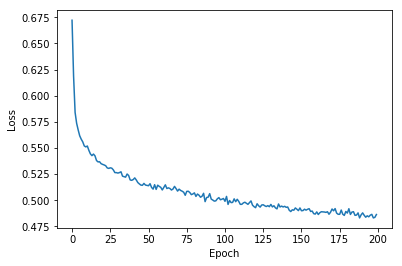

In [65]:
plt.plot(history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [46]:
def get_confusion_matrices(y_pred,y_test,bias=False, additional_measures=False):
    #Calculate confusion matrix
    if bias == False:
        bias = .5
    y_pred = y_pred > bias
    y_test = pd.DataFrame(y_test, dtype=np.int32)
    y_pred = np.array(y_pred, dtype=np.int32)
    y_test = pd.DataFrame(y_test)
    false_negatives = np.sum(np.logical_and(y_test == 1,y_pred==0),axis=0)#y_test is 1 while y_pred did not indicate
    false_positives = np.sum(np.logical_and(y_test == 0,y_pred==1),axis=0)#y_test is 0 while y_pred say it was 1
    true_positives = np.sum(np.logical_and(y_test == 1,y_pred==1),axis=0)#both indicate 1
    true_negatives = np.sum(np.logical_and(y_test == 0,y_pred==0),axis=0)#both indicate 0
    summary = pd.DataFrame()
    summary['False positive'] = false_positives
    summary['False negative'] = false_negatives
    summary['True positive'] = true_positives
    summary['True negative'] = true_negatives
    summary = pd.DataFrame(summary)
    #print(summary.sum(axis=1)[0])
    summary_percent = (summary/summary.sum(axis=1)[0])
    if additional_measures:
        #summary_percent['Accuracy'] = summary_percent['True positive'] + summary_percent['True negative']
        summary_percent['Sensitivity'] = summary_percent['True positive']/(summary_percent['True positive']+summary_percent['False negative'])
        summary_percent['Specificity'] = summary_percent['True negative']/(summary_percent['True negative']+summary_percent['False positive'])

    return summary, summary_percent

In [47]:
y_pred = model.predict(x_test)
conf = get_confusion_matrices(y_pred, y_test,False,True)

In [48]:
conf[0]

,False positive,False negative,True positive,True negative
is_bended,499,191,882,1034


In [63]:
conf[1].round(2)

,False positive,False negative,True positive,True negative,Sensitivity,Specificity
is_bended,0.19,0.07,0.34,0.4,0.82,0.67


In [64]:
conf[1].round(2).to_latex()

'\\begin{tabular}{lrrrrrr}\n\\toprule\n{} &  False positive &  False negative &  True positive &  True negative &  Sensitivity &  Specificity \\\\\n\\midrule\nis\\_bended &            0.19 &            0.07 &           0.34 &            0.4 &         0.82 &         0.67 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [50]:
conf[1].to_csv("confusion_matrix_angles.csv")

In [69]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def roc_characteristic(y_pred,y_test):
    fpr = []
    tpr = []
    biases = []
    for bias in np.linspace(-50,50,1000):
        print(".",end="")
        summary, _ = get_confusion_matrices(y_pred,y_test,bias=np.abs(sigmoid(bias)))
        fpv = summary["False positive"]/(summary["False positive"]+summary["True negative"])
        tpv = summary["True positive"]/(summary["True positive"]+summary["False negative"])
        biases.append(bias)
        fpr.append(fpv)
        tpr.append(tpv)
    return np.array([np.array(fpr), np.array(tpr)])

In [70]:
roc = roc_characteristic(model.predict(x_test), y_test)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

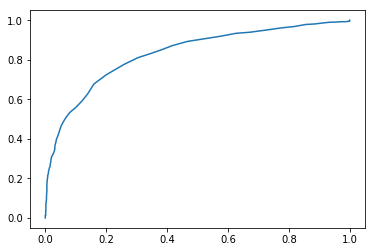

In [71]:
plt.plot(*roc)

In [72]:
np.save("roc_angles.npy",roc)

# Sources & further reading
- https://stackoverflow.com/questions/44164749/how-does-keras-handle-multilabel-classification
- https://math.stackexchange.com/questions/225047/estimate-confidence-interval-for-true-positive-rate-and-false-positive-rate